## 计算面积

- 基本思想：
    - 定义一个长方形包围曲线
    - 生成数据点，随机分布在长方形区域内
    - 区分出位于曲线下面的点
    - 利用概率进行面积计算：$$\frac{area\_under\_curve}{area\_of\_rectangle} = \frac{points\_under\_curve}{points\_in\_recrangle}$$
    
- 举例：
    - 计算曲线$y=5\sin (6x) + \sin(2x) + 7, x=(0,10)$下的面积

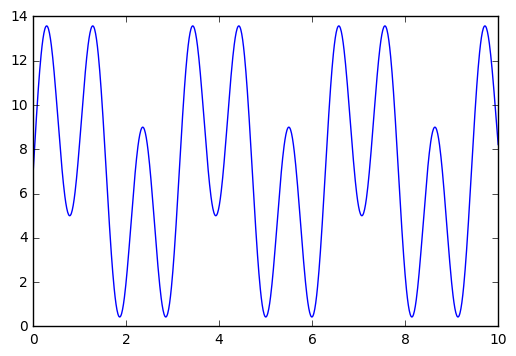

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import math

f = lambda x: 5 * np.sin(6 * x) + 3 * np.sin(2 * x) + 7
x = np.linspace(0, 10, 1000)
y = f(x)

_ = plt.plot(x,y)

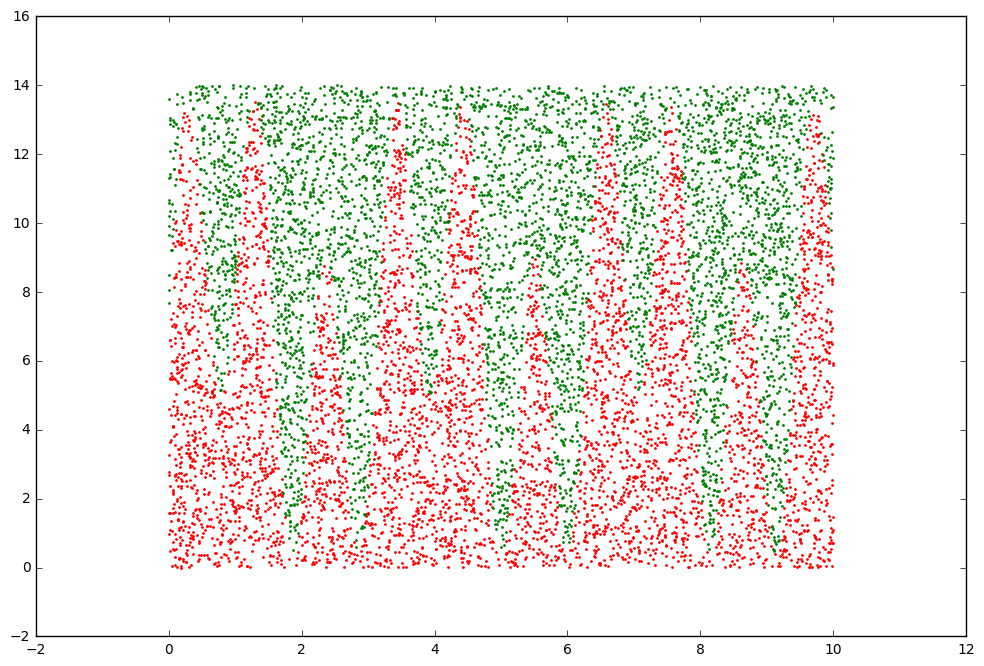

In [2]:
NUM_POINTS = 10000
rect_width = 10
rect_height = 14

rand_x = lambda: random.uniform(0, rect_width)
rand_y = lambda: random.uniform(0, rect_height)

points = [(rand_x(), rand_y()) for i in range(NUM_POINTS)]
points_under = [point for point in points if point[1] <= f(point[0])]
points_above = list(set(points) - set(points_under))

# Separate x's and y's to pass to scatter function.
(under_x, under_y) = zip(*list(points_under))
(over_x, over_y) = zip(*list(points_above))

fig = plt.figure()
fig.set_size_inches(12, 8)
_ = plt.scatter(under_x, under_y, s=1, color='red')
_ = plt.scatter(over_x, over_y, s=1, color='green')

In [3]:
area = rect_width * rect_height * len(points_under)*1.0/len(points)
print("Estimate of area under the curve:", area)

('Estimate of area under the curve:', 72.156)
